In [1]:
import numpy as np                       #矩阵操作
import pandas as pd                     #引入
from sklearn import preprocessing        #引入赌热编码，进行数据处理
from pandas import DataFrame
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss     #采用logloss作为评价指标
import matplotlib.pyplot as plt          #画图
import seaborn as sns                    #画图
import time

from utils import *
from FE_utils import *

%matplotlib inline

###  1、获取除'id','device_id','device_ip'外各特征的数值分布

#### 1.1 分批次读取所有数据，并获取其特征并形成字典list_class_rate_21

In [ ]:
filename= 'D:/Jupyter/w000/'
data_0=pd.read_csv(filename+'train',nrows=1)

data_all=pd.read_csv(filename+'train',chunksize=1000000)
list_cols=['id','device_id','device_ip']
list_class_rate_21=count_class_num(data_0,list_cols,list_drop=True,head_num_=500)

i=0
for data_s in data_all:
    start=time.time()
    list_class_rate_21_s=count_class_num(data_s,list_cols,list_drop=True,head_num_=100)
#将本次获得的dict与上一次获得的dict进行合并
    list_class_rate_21=combine_dict(list_class_rate_21_s,list_class_rate_21)
    
    i+=1
#    if i>5:
#        break
    end=time.time()
    print('data_num:'+str(i*1000000),str(end-start))        
    
list_class_rate_21

data_num:1000000 242.1632137298584
data_num:2000000 243.33733129501343
data_num:3000000 247.40773844718933
data_num:4000000 237.74677205085754
data_num:5000000 251.11810946464539
data_num:6000000 240.63091468811035
data_num:7000000 216.96441531181335
data_num:8000000 223.97399973869324
data_num:9000000 242.6379997730255
data_num:10000000 238.71900010108948
data_num:11000000 246.6159999370575
data_num:12000000 245.838623046875
data_num:13000000 238.24782252311707
data_num:14000000 234.15441298484802
data_num:15000000 231.06810450553894
data_num:16000000 226.7366714477539
data_num:17000000 249.17291474342346
data_num:18000000 237.29172682762146
data_num:19000000 51606.064303159714
data_num:20000000 225.8632493019104


In [6]:
with open('D:/21w_class.txt','w')as file:
    for k,v in list_class_rate_21.items():
        file.write('!')        
        file.write(k)
        for key,value in v.items():
            file.write('|'+str(key))
            file.write('>'+str(value))     

#### 1.2 查看21个特征中不同占比的分布，有个直观印象

In [9]:
xx='C1'
count_head(list_class_rate_21[xx],xx,0.02)

4
C1 : 0.0040599999999999525 



{1002: 0.05493, 1005: 0.91866, 1010: 0.02235, 'other': 0.0040599999999999525}

In [10]:
xx='banner_pos'
count_head(list_class_rate_21[xx],xx,0.02)

3
banner_pos : 0.0017800000000000038 



{0: 0.72002, 1: 0.2782, 'other': 0.0017800000000000038}

In [11]:
xx='site_id'
count_head(list_class_rate_21[xx],xx,0.02)

108
site_id : 0.019820000000000504 



{'0a742914': 0.00667,
 '0c2fe9d6': 0.00077,
 '0eb72673': 0.00265,
 '12fb4121': 0.00473,
 '16c73019': 0.00238,
 '178a7b89': 0.00162,
 '17caea14': 0.00688,
 '1a5c1d83': 0.00046,
 '1b171d6d': 0.00059,
 '1fbe01fe': 0.16043,
 '203b00f1': 0.00048,
 '222acd54': 0.00122,
 '2328ee8e': 0.00118,
 '235ba823': 0.00103,
 '26fa1946': 0.0019,
 '29229f8e': 0.00057,
 '294411bf': 0.0005,
 '2a68aa20': 0.00171,
 '2b1ddb24': 0.00164,
 '2fdff0f2': 0.00071,
 '3281baa7': 0.00086,
 '38217daf': 0.00228,
 '3dc2d6de': 0.00082,
 '43d6df75': 0.0018,
 '4bf5bbe2': 0.00367,
 '4e7614cf': 0.0021,
 '5114c672': 0.00409,
 '517b8671': 0.00127,
 '543a539e': 0.00096,
 '57ef2c87': 0.00765,
 '57fe1b20': 0.00655,
 '5b08c53b': 0.02259,
 '5b4d2eda': 0.01908,
 '5b787406': 0.00093,
 '5bcf81a2': 0.00833,
 '5ee41ff2': 0.00863,
 '61a8c644': 0.00062,
 '6256f5b4': 0.00781,
 '6399eda6': 0.0085,
 '6c5b482c': 0.00473,
 '6ec06dbd': 0.00318,
 '6fcff501': 0.00082,
 '7294ea0f': 0.00152,
 '7443a906': 0.00055,
 '75f43c5a': 0.0006,
 '763a42b5': 0.0

In [98]:
xx='site_domain'
count_head(list_class_rate_21[xx],xx,0.01)

site_domain : 0.054277665460073087
110
site_domain : 0.009869999999999712 



{'c4e18dd6': 0.37428,
 'f3845767': 0.16043,
 '7e091613': 0.08224,
 'other': 0.009869999999999712,
 '7687a86e': 0.03191,
 '98572c79': 0.02466,
 '16a36ef3': 0.02117,
 '58a89a43': 0.01894,
 'b12b9f85': 0.00925,
 '9d54950b': 0.00923,
 '17d996e6': 0.00875,
 '968765cd': 0.0085,
 '28f93029': 0.00781,
 'bd6d812f': 0.00766,
 'd262cf1e': 0.00717,
 '0dde25ec': 0.00688,
 '510bd839': 0.00667,
 '5c9ae867': 0.00665,
 '5b626596': 0.00658,
 'a17bde68': 0.00641,
 'c4342784': 0.00641,
 '6b59f079': 0.00596,
 'bb1ef334': 0.00577,
 '7256c623': 0.00542,
 'a434fa42': 0.00508,
 'd733bbc3': 0.00416,
 '3f2f3819': 0.00409,
 '6b560cc1': 0.00367,
 'c1aa3c04': 0.00316,
 '27e3c518': 0.00312,
 'e2a5dc06': 0.00291,
 '9f448720': 0.0028,
 'd2f72222': 0.00265,
 '6e882918': 0.00245,
 '449497bc': 0.00244,
 '8025317b': 0.00241,
 'ce307e01': 0.00236,
 '98acf46c': 0.00233,
 'ace5b8fd': 0.00229,
 '9eaf88fa': 0.00221,
 '0d3cb7be': 0.00221,
 '1e0acfb4': 0.00221,
 '75f9ddc3': 0.00205,
 '9690165f': 0.00193,
 'de0f0f82': 0.00184,
 '

In [100]:
xx='site_category'
count_head(list_class_rate_21[xx],xx,0.01)

site_category : 0.0
7
site_category : 0.009749999999999925 



{'50e219e0': 0.40904,
 'f028772b': 0.31307,
 '28905ebd': 0.18247,
 '3e814130': 0.07545,
 'f66779e6': 0.00624,
 '75fa27f6': 0.00398,
 'other': 0.009749999999999925}

In [101]:
xx='app_id'
count_head(list_class_rate_21[xx],xx,0.01)

app_id : 0.03664337907413318
145
app_id : 0.009900000000000353 



{'ecad2386': 0.63897,
 '92f5800b': 0.03846,
 'other': 0.009900000000000353,
 'e2fcccd2': 0.02793,
 'febd1138': 0.01878,
 '9c13b419': 0.01874,
 '7358e05e': 0.01523,
 'a5184c22': 0.01215,
 'd36838b1': 0.0113,
 '685d1c4c': 0.01007,
 '54c5d545': 0.00984,
 '03528b27': 0.00797,
 'f0d41ff1': 0.00725,
 'e9739828': 0.00703,
 'e2a1ca37': 0.00696,
 '51cedd4e': 0.00591,
 '66f5e02e': 0.00559,
 '98fed791': 0.00541,
 '03a08c3f': 0.00539,
 '73206397': 0.00493,
 'f53417e1': 0.00491,
 'e96773f0': 0.00437,
 'ce183bbd': 0.00364,
 'be7c618d': 0.00297,
 'f888bf4c': 0.00258,
 '1dc72b4d': 0.00257,
 '396df801': 0.00243,
 '3c4b944d': 0.0022,
 '39947756': 0.00214,
 'cf0327f9': 0.00209,
 '3f2a6cbb': 0.00206,
 '53de0284': 0.002,
 'de97da65': 0.00197,
 '8b89048f': 0.00181,
 'ffc6ffd0': 0.00173,
 '4e02fbd3': 0.00164,
 'd44c074c': 0.00164,
 '3bfa19cb': 0.00157,
 '45aff1a2': 0.00147,
 'a4869716': 0.0014,
 '0acbeaa3': 0.00137,
 '3e2bf98d': 0.00136,
 'd644e4e7': 0.00128,
 '04f2be5f': 0.00123,
 '4b08f369': 0.00122,
 'c8e

In [102]:
xx='app_domain'
count_head(list_class_rate_21[xx],xx,0.01)

app_domain : 6.737743095495289e-05
16
app_domain : 0.009339999999999904 



{'7801e8d9': 0.6737,
 '2347f47a': 0.12963,
 'ae637522': 0.04655,
 '5c5a694b': 0.02793,
 '82e27996': 0.01878,
 'd9b5648e': 0.01766,
 '0e8616ad': 0.01634,
 'b9528b13': 0.01598,
 'b8d325c3': 0.01321,
 'aefc06bd': 0.00739,
 'df32afa9': 0.00721,
 '33da2e74': 0.00642,
 '6f7ca2ba': 0.00559,
 '5b9c592b': 0.00258,
 '885c7f3f': 0.00169,
 'other': 0.009339999999999904}

In [105]:
xx='app_category'
count_head(list_class_rate_21[xx],xx,0.01)

6
app_category : 0.008949999999999902 



{'07d7df22': 0.6472,
 '0f2161f8': 0.23649,
 'cef3e649': 0.04283,
 '8ded1f7a': 0.03629,
 'f95efa07': 0.02824,
 'other': 0.008949999999999902}

In [106]:
xx='device_model'
count_head(list_class_rate_21[xx],xx,0.01)

141
device_model : 0.00979999999999992 



{'other': 0.00979999999999992,
 '8a4875bd': 0.06074,
 '1f0bc64f': 0.03524,
 'd787e91b': 0.03476,
 '76dc4769': 0.019,
 'be6db1d7': 0.01838,
 'a0f5f879': 0.01615,
 '4ea23a13': 0.01596,
 '7abbbd5c': 0.01575,
 'ecb851b2': 0.01516,
 'd4897fef': 0.01196,
 '5096d134': 0.01176,
 '711ee120': 0.01107,
 '1ccc7835': 0.01054,
 'e1eae715': 0.01014,
 'c6263d8a': 0.00984,
 '84ebbcd4': 0.0096,
 'be74e6fe': 0.00939,
 '3bd9e8e7': 0.0089,
 'f07e20f8': 0.00889,
 '0eb711ec': 0.00884,
 '3bb1ddd7': 0.00873,
 '981edffc': 0.00855,
 '779d90c2': 0.00852,
 '36b67a2a': 0.00849,
 'fce66524': 0.00849,
 '0bcabeaf': 0.00844,
 '5db079b5': 0.00781,
 'aad45b01': 0.00751,
 '158e4944': 0.00711,
 'a5bce124': 0.00691,
 'ef726eae': 0.00687,
 '99e427c9': 0.00633,
 '36d749e5': 0.00618,
 '496515fa': 0.0055,
 '2ea4f8ba': 0.00542,
 'be87996b': 0.00525,
 '2203a096': 0.00498,
 '43e7b962': 0.00473,
 '5ec45883': 0.00465,
 '24f6b932': 0.00464,
 '684581ce': 0.00458,
 'cd5b1559': 0.00441,
 '6e1e2240': 0.00423,
 '6332421a': 0.00395,
 '9e38

In [107]:
xx='device_type'
count_head(list_class_rate_21[xx],xx,0.01)

4
device_type : 0.0031999999999999806 



{1: 0.92272, 0: 0.05493, 4: 0.01915, 'other': 0.0031999999999999806}

In [108]:
xx='device_conn_type'
count_head(list_class_rate_21[xx],xx,0.01)

4
device_conn_type : 0.0010499999999999954 



{0: 0.86292, 2: 0.08206, 3: 0.05397, 'other': 0.0010499999999999954}

In [109]:
xx='C14'
count_head(list_class_rate_21[xx],xx,0.01)

373
C14 : 0.009940000000001281 



{'other': 0.009940000000001281,
 4687: 0.02345,
 21611: 0.02238,
 21189: 0.01875,
 21191: 0.01874,
 19771: 0.01806,
 19772: 0.01804,
 16208: 0.01618,
 20108: 0.01452,
 8330: 0.01363,
 19950: 0.01302,
 15701: 0.01254,
 15705: 0.01253,
 15703: 0.01245,
 15699: 0.01239,
 15704: 0.01235,
 15707: 0.01233,
 15708: 0.01233,
 15702: 0.01192,
 15706: 0.01173,
 16615: 0.01083,
 23804: 0.01006,
 21767: 0.00929,
 21768: 0.00923,
 17239: 0.00843,
 22676: 0.00842,
 19251: 0.00839,
 6563: 0.00728,
 17654: 0.00723,
 17653: 0.00717,
 21790: 0.00694,
 16920: 0.0065,
 20633: 0.00624,
 23438: 0.00619,
 17753: 0.00605,
 17614: 0.006,
 23143: 0.00594,
 23144: 0.00583,
 20251: 0.00552,
 20634: 0.00543,
 17264: 0.00529,
 20093: 0.00505,
 21769: 0.005,
 17262: 0.00493,
 21770: 0.00492,
 22680: 0.00455,
 17014: 0.00453,
 22683: 0.00449,
 22681: 0.00446,
 23161: 0.00445,
 23160: 0.00436,
 21789: 0.00428,
 17037: 0.00419,
 20632: 0.004,
 22682: 0.00396,
 16688: 0.00391,
 20277: 0.00387,
 19665: 0.00378,
 17016: 0

In [110]:
xx='C15'
count_head(list_class_rate_21[xx],xx,0.01)

3
C15 : 0.009469999999999978 



{320: 0.93272, 300: 0.05781, 'other': 0.009469999999999978}

In [111]:
xx='C16'
count_head(list_class_rate_21[xx],xx,0.01)

4
C16 : 0.004629999999999912 



{50: 0.9433, 250: 0.04468, 36: 0.00739, 'other': 0.004629999999999912}

In [112]:
xx='C17'
count_head(list_class_rate_21[xx],xx,0.01)

238
C17 : 0.009810000000000874 



{1722: 0.11164,
 2424: 0.03787,
 2227: 0.03644,
 1800: 0.02944,
 423: 0.02345,
 2480: 0.02272,
 2502: 0.02115,
 2528: 0.02039,
 2506: 0.01984,
 2374: 0.01871,
 2545: 0.01765,
 1872: 0.0172,
 'other': 0.009810000000000874,
 1994: 0.01496,
 2299: 0.01453,
 2526: 0.01452,
 1863: 0.014,
 761: 0.01381,
 2333: 0.01269,
 1993: 0.01226,
 2665: 0.01199,
 2676: 0.01177,
 1873: 0.01164,
 2507: 0.01106,
 2726: 0.01006,
 2647: 0.00897,
 2566: 0.00893,
 2667: 0.00881,
 1973: 0.00843,
 2616: 0.00842,
 2201: 0.00839,
 2513: 0.00778,
 2495: 0.00739,
 572: 0.00728,
 2036: 0.0072,
 2340: 0.00718,
 2716: 0.0068,
 2162: 0.00662,
 1899: 0.0065,
 2060: 0.00649,
 2283: 0.00626,
 178: 0.0062,
 2684: 0.00619,
 112: 0.00603,
 2039: 0.00595,
 2331: 0.00589,
 122: 0.00582,
 2323: 0.0056,
 1887: 0.00528,
 2295: 0.00519,
 2281: 0.00511,
 479: 0.00492,
 2624: 0.00482,
 2420: 0.00436,
 2512: 0.00434,
 1934: 0.00424,
 2229: 0.00408,
 2291: 0.00405,
 2253: 0.00403,
 547: 0.00379,
 2717: 0.00369,
 2572: 0.00359,
 2524: 0

In [113]:
xx='C18'
count_head(list_class_rate_21[xx],xx,0.01)

5
C18 : 1.0000000000065512e-05 



{0: 0.41898,
 3: 0.33773,
 2: 0.17601,
 1: 0.06727,
 'other': 1.0000000000065512e-05}

In [114]:
xx='C19'
count_head(list_class_rate_21[xx],xx,0.01)

43
C19 : 0.008999999999999897 



{35: 0.30104,
 39: 0.21839,
 167: 0.07781,
 161: 0.03927,
 47: 0.03591,
 1327: 0.02703,
 297: 0.0251,
 163: 0.02293,
 175: 0.02007,
 679: 0.01824,
 935: 0.01742,
 687: 0.01375,
 1063: 0.01293,
 41: 0.01269,
 33: 0.01183,
 431: 0.01064,
 803: 0.01006,
 1319: 0.00976,
 303: 0.00812,
 419: 0.00804,
 171: 0.00759,
 169: 0.00722,
 299: 0.00722,
 427: 0.00668,
 34: 0.00651,
 291: 0.00641,
 547: 0.00613,
 43: 0.00526,
 815: 0.00515,
 38: 0.00452,
 1451: 0.00334,
 937: 0.00303,
 1059: 0.00272,
 811: 0.00259,
 1065: 0.0025,
 809: 0.00247,
 1711: 0.00233,
 675: 0.00219,
 559: 0.00211,
 813: 0.00151,
 551: 0.00129,
 681: 0.0012,
 'other': 0.008999999999999897}

In [117]:
xx='C20'
count_head(list_class_rate_21[xx],xx,0.01)

76
C20 : 0.010010000000000296 



{-1: 0.46842,
 100084: 0.06032,
 100148: 0.0444,
 100111: 0.04246,
 100077: 0.03897,
 100075: 0.03825,
 100081: 0.03307,
 100083: 0.02655,
 100156: 0.02554,
 100193: 0.0175,
 100176: 0.01606,
 100074: 0.01453,
 100079: 0.0143,
 100189: 0.01179,
 100076: 0.01133,
 100192: 0.00581,
 100190: 0.00558,
 100191: 0.00552,
 100188: 0.00545,
 100013: 0.0049,
 100031: 0.00459,
 100155: 0.004,
 100194: 0.00363,
 100181: 0.00352,
 100000: 0.00346,
 100233: 0.00293,
 100105: 0.0029,
 100182: 0.00289,
 100003: 0.00286,
 'other': 0.010010000000000296,
 100119: 0.0028,
 100170: 0.00278,
 100173: 0.00253,
 100199: 0.00242,
 100200: 0.00239,
 100020: 0.00218,
 100004: 0.0021,
 100034: 0.00205,
 100160: 0.00203,
 100177: 0.00199,
 100202: 0.00191,
 100221: 0.00188,
 100057: 0.00185,
 100162: 0.00179,
 100050: 0.00177,
 100005: 0.00169,
 100094: 0.00162,
 100130: 0.0016,
 100228: 0.00159,
 100151: 0.00145,
 100101: 0.00143,
 100021: 0.00143,
 100103: 0.00128,
 100171: 0.00127,
 100019: 0.00127,
 100028: 0

In [118]:
xx='C21'
count_head(list_class_rate_21[xx],xx,0.01)

41
C21 : 0.008500000000000174 



{23: 0.22005,
 221: 0.12494,
 79: 0.11415,
 48: 0.05345,
 71: 0.05215,
 61: 0.0508,
 157: 0.04591,
 32: 0.04411,
 33: 0.03704,
 52: 0.02976,
 42: 0.0252,
 51: 0.02103,
 15: 0.01897,
 212: 0.01632,
 43: 0.01457,
 117: 0.01039,
 229: 0.01006,
 13: 0.00951,
 16: 0.00859,
 156: 0.00828,
 68: 0.00802,
 159: 0.00718,
 95: 0.00685,
 46: 0.00583,
 246: 0.00499,
 69: 0.00436,
 91: 0.00418,
 17: 0.00411,
 111: 0.00347,
 76: 0.00342,
 70: 0.0033,
 90: 0.00318,
 110: 0.003,
 171: 0.00287,
 204: 0.00229,
 101: 0.00201,
 253: 0.00194,
 112: 0.00184,
 82: 0.00177,
 100: 0.00161,
 'other': 0.008500000000000174}

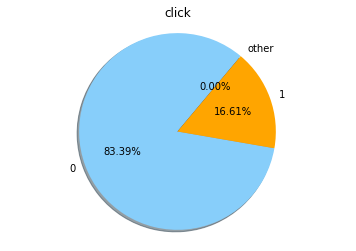

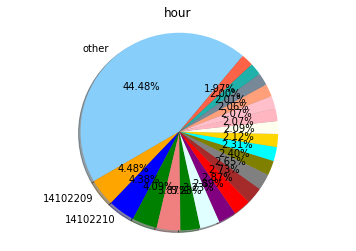

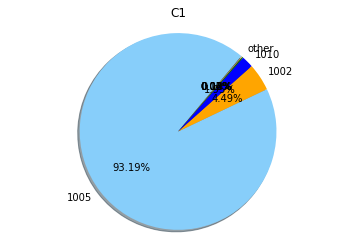

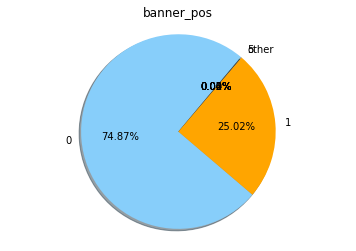

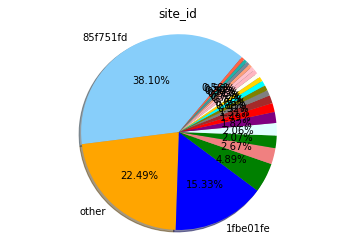

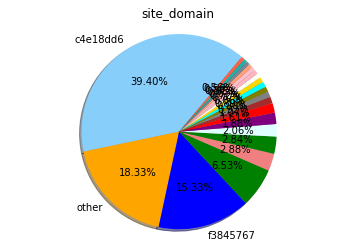

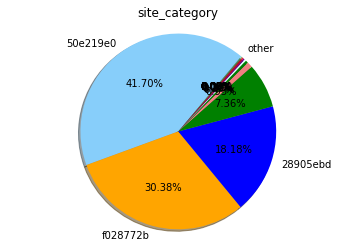

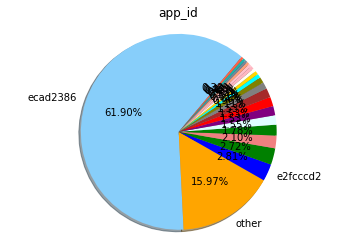

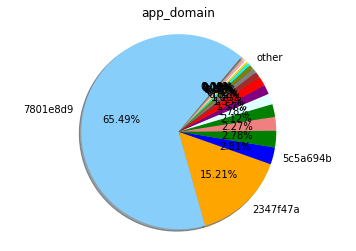

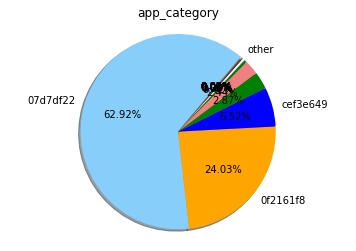

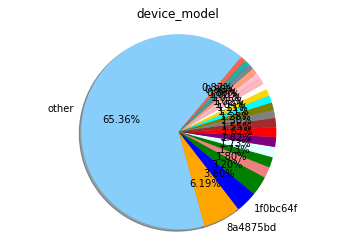

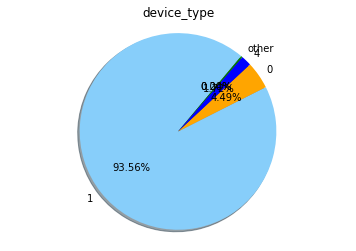

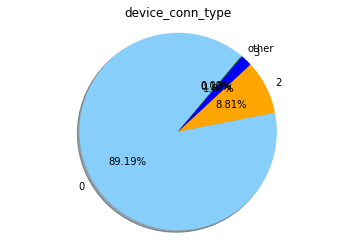

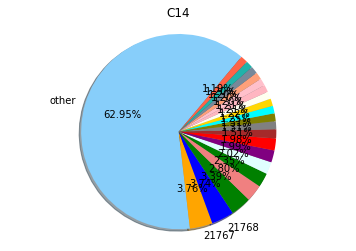

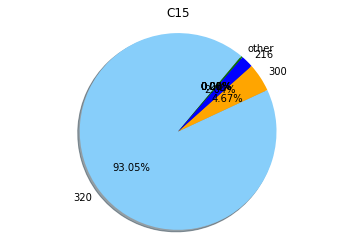

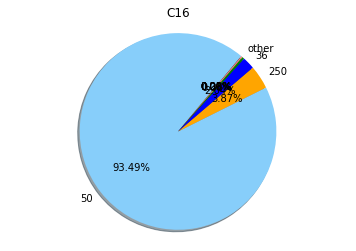

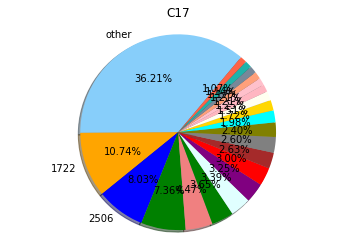

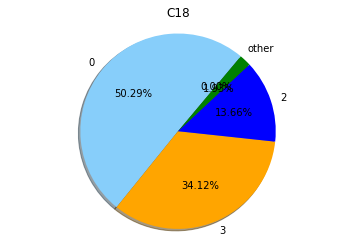

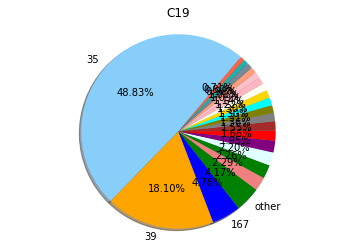

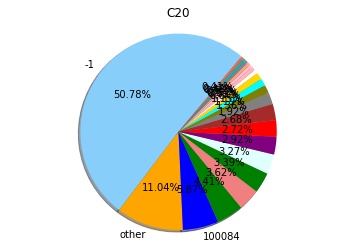

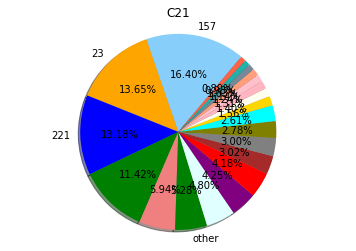

In [116]:
for key,value in list_class_rate_21.items():
    plt_pie(value,key,3)

### 2、读取各特征占数据量前1%的维度的字典

In [2]:
#获取除hour,click,device_id,device_ip,id外的19维编码
#此处需先生成list_class_rate_21，此处由于属于事后整理，故而暂不再运行
dict_19_={}
for k,v in list_class_rate_21.items():
    dict_19_[k]=count_head(v,k,0.01)
dict_19_.pop('click')   
dict_19_.pop('hour')   

i=0
for key,value in dict_19_.items():
    i+=len(value)
print(i)

NameError: name 'list_class_rate_21' is not defined

In [72]:
print(dict_19_.keys())
print(len(dict_19_))

dict_keys(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'])
19


In [ ]:
for k,v in dict_19_.items():
    dict_19_[k].pop('other') 

In [ ]:
#将19维特征、1%特征维度中，维度名字是int型的还原为int
list_int=['click','hour','C1','banner_pos','device_type','device_conn_type','C14','C15','C16','C17','C18','C19','C20','C21']
dict_19={}
for k,v in dict_19_.items():
    dict_={}
    if k in list_int:
        for key,value in v.items():
            dict_[int(key)]=value
    else:
        for key,value in v.items():
            dict_[key]=value        
    dict_19[k]=dict_

### 3、获取在数据集上除hour、id、click、device_id、device_ip外所有特征维度名字的集合

In [41]:
filename= 'D:/Jupyter/w000/'
data_0=pd.read_csv(filename+'train',nrows=1)
data_all=pd.read_csv(filename+'train',chunksize=2000000)
data_0.drop(['hour','id','click','device_id','device_ip'], inplace = True, axis = 1)

In [42]:
#历遍训练数据中所有19维特征的名称
dict_name_all=count_name(data_0)
i=0
for data in data_all:
    data.drop(['hour','id','click','device_id','device_ip'], inplace = True, axis = 1)
    dict_name_s=count_name(data)
    dict_name_all=combine_dict_list(dict_name_all,dict_name_s)
    i+=1
    print('num:'+str(i*2000000))

num:2000000
num:4000000
num:6000000
num:8000000
num:10000000
num:12000000
num:14000000
num:16000000
num:18000000
num:20000000
num:22000000
num:24000000
num:26000000
num:28000000
num:30000000
num:32000000
num:34000000
num:36000000
num:38000000
num:40000000
num:42000000


In [43]:
#历遍测试集合数据中所有19维特征的名称
data_all=pd.read_csv(filename+'test',chunksize=2000000)
i=0
for data in data_all:
    data.drop(['hour','id','device_id','device_ip'], inplace = True, axis = 1)
    dict_name_s=count_name(data)
    dict_name_all=combine_dict_list(dict_name_all,dict_name_s)
    i+=1
    print('num:'+str(i*2000000))

num:2000000
num:4000000
num:6000000


#### 3.1 存储19个特征的特征工程字典，other取为999

In [ ]:
write_double_dict('D:/FE_19.txt',dict_name_all_dict)

In [25]:
aaa=read_double_dict('D:/FE_19.txt',key_int=False)
#生成每个特征中other特征的编号：为所有特征维数-1
length_dict={}
for k,v in aaa.items():
    name=[]
    for key,value in v.items():
        name.append(value)
    length=len(set(name))
    length_dict[k]=int(length)-1
length_dict

{'C1': 3,
 'C14': 372,
 'C15': 2,
 'C16': 3,
 'C17': 237,
 'C18': 3,
 'C19': 42,
 'C20': 75,
 'C21': 40,
 'app_category': 5,
 'app_domain': 15,
 'app_id': 144,
 'banner_pos': 2,
 'device_conn_type': 3,
 'device_model': 140,
 'device_type': 3,
 'site_category': 6,
 'site_domain': 109,
 'site_id': 128}

In [17]:
#生成240个小时的列表
hour_list=[]
for data in range(0,10):
    for hour in range(0,24):
        hour_list.append(14102100+data*100+hour)
hour_list

[14102100,
 14102101,
 14102102,
 14102103,
 14102104,
 14102105,
 14102106,
 14102107,
 14102108,
 14102109,
 14102110,
 14102111,
 14102112,
 14102113,
 14102114,
 14102115,
 14102116,
 14102117,
 14102118,
 14102119,
 14102120,
 14102121,
 14102122,
 14102123,
 14102200,
 14102201,
 14102202,
 14102203,
 14102204,
 14102205,
 14102206,
 14102207,
 14102208,
 14102209,
 14102210,
 14102211,
 14102212,
 14102213,
 14102214,
 14102215,
 14102216,
 14102217,
 14102218,
 14102219,
 14102220,
 14102221,
 14102222,
 14102223,
 14102300,
 14102301,
 14102302,
 14102303,
 14102304,
 14102305,
 14102306,
 14102307,
 14102308,
 14102309,
 14102310,
 14102311,
 14102312,
 14102313,
 14102314,
 14102315,
 14102316,
 14102317,
 14102318,
 14102319,
 14102320,
 14102321,
 14102322,
 14102323,
 14102400,
 14102401,
 14102402,
 14102403,
 14102404,
 14102405,
 14102406,
 14102407,
 14102408,
 14102409,
 14102410,
 14102411,
 14102412,
 14102413,
 14102414,
 14102415,
 14102416,
 14102417,
 14102418,

In [ ]:
#将原数据中的other由999替换成length_dict中的数字（除原始特征为的下一个数字）
def change_other(row,length_dict):
    for key,value in length_dict.items():
        row[row[key]==999]=value
    return row

file_dir='D:/Jupyter/w000/for_train/hour/'
save_dir='D:/Jupyter/w000/for_train/hour_new/'
i=0
for hour in hour_list:
    data=pd.read_csv(file_dir+str(hour))
    data=data.apply(lambda row: change_other(row,length_dict), axis=1)
    i+=1
    if i>0:
        break
    print(str(i),str(hour))
    data.to_csv(save_dir+str(hour))
    del data

#### 3.2遍历训练集、测试集上hour的特征维数

In [27]:
filename= 'D:/Jupyter/w000/'
data_0=pd.read_csv(filename+'train',nrows=10)
data_all=pd.read_csv(filename+'train',chunksize=2000000)
data_0['hour']

0    14102100
1    14102100
2    14102100
3    14102100
4    14102100
5    14102100
6    14102100
7    14102100
8    14102100
9    14102100
Name: hour, dtype: int64

In [46]:
filename= 'D:/Jupyter/w000/'
data_0=pd.read_csv(filename+'train',nrows=1)
data_all=pd.read_csv(filename+'train',chunksize=2000000)
dict_name_all=count_name(data_0['hour'])
i=0
for data in data_all:
    dict_name_s=count_name(data['hour'])
    dict_name_all=combine_dict_list(dict_name_all,dict_name_s)
    i+=1
    print('num:'+str(i*2000000))
    
#历遍测试集合数据中所有19维特征的名称
data_all=pd.read_csv(filename+'test',chunksize=2000000)
i=0
for data in data_all:
    dict_name_s=count_name(data['hour'])
    dict_name_all=combine_dict_list(dict_name_all,dict_name_s)
    i+=1
    print('num:'+str(i*2000000))

AttributeError: 'int' object has no attribute 'items'

#### 3.3 就hour特征创建3个表征hour，days，星期几的特征

In [141]:
hour_FE=read_dict('d:/hour_FE.txt')
FE_hour_hours={}
for key,value in hour_FE.items():
    FE_hour_hours[key]=int(str(key)[6:8])
    
FE_hour_weekday={}
for key,value in hour_FE.items():
    day=int(str(key)[4:6])
    weekday=(day-19)%7
    FE_hour_weekday[key]=weekday
    
FE_hour_days={}
for key,value in hour_FE.items():
    day=int(str(key)[4:6])
    days=day-21
    FE_hour_days[key]=days
    
FE_hour={}
FE_hour['FE_hour_hours']=FE_hour_hours
FE_hour['FE_hour_weekday']=FE_hour_weekday
FE_hour['FE_hour_days']=FE_hour_days
write_double_dict('d:/FE_hour.txt',FE_hour)
